### Acknowledgement
Name: Zuha Aqib     
ERP ID: 26106    
Section: 10am Miss Solat     
Date: (written on) 18-Feb-25     

code has been taken from Miss Solat's code files and written by Zuha themselves. 

In [159]:
from datetime import datetime
print("Last time code executed:", datetime.now().strftime("%Y-%m-%d %H:%M:%S"))

Last time code executed: 2025-02-23 01:40:30


In [160]:
erp = 26106 
# will be referenced later on in the code when we use it for random_state
erp

26106

# Imports
here we import all the necessary libraries and modules

In [161]:
# to load the dataset
import warnings
warnings.filterwarnings('ignore')

# to handle the data and perform numerical operations on it
import pandas as pd
import numpy as np

# to do natural language processing
import nltk

# preprocessing: to clean the data
import re

# preprocessing: words tokenization
from nltk.tokenize import word_tokenize

# preprocessing: stemmming and lemmatization
from nltk.stem import PorterStemmer, WordNetLemmatizer
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')

# vectorization: BOW
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# vectorization: LSA
from sklearn.decomposition import TruncatedSVD

# clustering: k means
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to plot the graph
import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


# Time Displayer
this code is a function that we will call at multiple instances of the code to see how long it took to run the code to see when it ran

In [162]:
# Function to get current date and time as a string
def get_current_datetime():
    return datetime.now().strftime("%Y-%m-%d %H:%M:%S")

# Load the Dataset
Here we load the dataset from a csv file and then save it into a variable

In [163]:
df = pd.read_csv("dataset/news_Feb_14.csv")
df = df.iloc[:, 0]  # Select only the headline column
documents = df.tolist()  # Convert to list
documents

['ECC endorses purchase of $582mn capital shares in BRICS’s New Development Bank',
 'Netanyahu’s statement to establish Palestinian state in Saudi Arabia irresponsible, provocative: FO',
 'India, US agree to resolve trade and tariff rows after Trump-Modi talks',
 'Aurangzeb discusses Pakistan’s structural reforms with IFC chief',
 'HBL, S&P Global launch Pakistan’s first manufacturing PMI',
 'KSE-100 closes 479 points lower as late-session selling erases intra-day gains',
 'PPL executes agreements for Sui Gas Field operations',
 'Hubco Green, PSO collaborate to setup EV charging infrastructure across Pakistan',
 'Rupee records marginal improvement against US dollar',
 'At least 9 dead, 7 injured in Balochistan’s Harnai blast',
 'Gold adds to record rally, reaches Rs306,200 per tola in Pakistan',
 'IMF’s 2024 Article IV report, and debate on inflation—I',
 'Pakistan CPI 2024 – deep-rooted corruption persists',
 '‘Like a wormhole’: Musk promises ‘Dubai Loop’ tunnel network',
 'Reforming 

In [164]:
original_headlines = documents.copy()  # Keep original headlines before preprocessing

# Preprocessing
here we perform the preprocessing of data like:
- lowercase text
- stopword removal
- stemming or lemmatization
- n-grams

## Lowercase Conversion
here we convert our text to lowercase to have accurate DTM/TDM

In [165]:
documents = [document.lower() for document in documents]

print("Finished executing at:", get_current_datetime())
documents

Finished executing at: 2025-02-23 01:40:37


['ecc endorses purchase of $582mn capital shares in brics’s new development bank',
 'netanyahu’s statement to establish palestinian state in saudi arabia irresponsible, provocative: fo',
 'india, us agree to resolve trade and tariff rows after trump-modi talks',
 'aurangzeb discusses pakistan’s structural reforms with ifc chief',
 'hbl, s&p global launch pakistan’s first manufacturing pmi',
 'kse-100 closes 479 points lower as late-session selling erases intra-day gains',
 'ppl executes agreements for sui gas field operations',
 'hubco green, pso collaborate to setup ev charging infrastructure across pakistan',
 'rupee records marginal improvement against us dollar',
 'at least 9 dead, 7 injured in balochistan’s harnai blast',
 'gold adds to record rally, reaches rs306,200 per tola in pakistan',
 'imf’s 2024 article iv report, and debate on inflation—i',
 'pakistan cpi 2024 – deep-rooted corruption persists',
 '‘like a wormhole’: musk promises ‘dubai loop’ tunnel network',
 'reforming 

## Data Cleaning
here we clean the data

In [166]:
import re
import unicodedata

def clean_text(text):
    text = text.encode('ascii', 'ignore').decode()  # Remove non-ASCII characters
    text = unicodedata.normalize("NFKD", text)  # Normalize Unicode text
    
    # Separate numbers attached to words
    text = re.sub(r'(?<=\d)(?=[a-zA-Z])', ' ', text)  # number-word
    text = re.sub(r'(?<=[a-zA-Z])(?=\d)', ' ', text)  # word-number
    
    text = text.replace("-", " ") # replace hyphens with spaces to tokenize the numbers and words
    text = re.sub(r'[^\w\s,]', '', text)  # Remove everything except words, numbers, and commas
    text = re.sub(r'\s+', ' ', text).strip()   # remove extra spaces
    
    return text

In [167]:
documents = [clean_text(text) for text in documents]
documents

['ecc endorses purchase of 582 mn capital shares in bricss new development bank',
 'netanyahus statement to establish palestinian state in saudi arabia irresponsible, provocative fo',
 'india, us agree to resolve trade and tariff rows after trump modi talks',
 'aurangzeb discusses pakistans structural reforms with ifc chief',
 'hbl, sp global launch pakistans first manufacturing pmi',
 'kse 100 closes 479 points lower as late session selling erases intra day gains',
 'ppl executes agreements for sui gas field operations',
 'hubco green, pso collaborate to setup ev charging infrastructure across pakistan',
 'rupee records marginal improvement against us dollar',
 'at least 9 dead, 7 injured in balochistans harnai blast',
 'gold adds to record rally, reaches rs 306,200 per tola in pakistan',
 'imfs 2024 article iv report, and debate on inflationi',
 'pakistan cpi 2024 deep rooted corruption persists',
 'like a wormhole musk promises dubai loop tunnel network',
 'reforming pension funds i

## Stop Words Removal
here we remove stop words. but we initialize stop words in count vectorizer. we have two other options of:
- either declaring all possible stop words and then iteratively checking each word in the document if its a stop word and then adding the non-stop words. However this is not a good practice. 
- pulling stop words from ```ntlk``` library:
```
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
documents_no_stopwords = [" ".join([word for word in doc.split() if word not in stop_words]) 
```
however after running this code it didnt not remove stop words thus i removed it

In [168]:
stop_word = False
stop_word_language = 'english'

stop_word

False

## Reduction
here we change words to a smaller common form instead of the 's. We do this using two ways:
- stemming
- lemmatization

### Stemming
this reduces words to their singular form however it is not said to be very good. we cannot say this surely as we have not rigourously tested it yet. 

In [169]:
# stemmer = PorterStemmer()
# documents = [" ".join([stemmer.stem(word) for word in doc.split()]) for doc in documents]

# print("Finished executing at:", get_current_datetime())
# documents

### Lemmatization
this also reduces words to their singular form and is said to be better as it only reduces to words in the dictionary. but again we cannot say this surely as we have not tested it yet. 

In [170]:
# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatize_doc(text):
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmatized_tokens)

In [171]:
documents = [lemmatize_doc(doc) for doc in documents]
documents

['ecc endorses purchase of 582 mn capital share in bricss new development bank',
 'netanyahus statement to establish palestinian state in saudi arabia irresponsible , provocative fo',
 'india , u agree to resolve trade and tariff row after trump modi talk',
 'aurangzeb discusses pakistan structural reform with ifc chief',
 'hbl , sp global launch pakistan first manufacturing pmi',
 'kse 100 close 479 point lower a late session selling erases intra day gain',
 'ppl executes agreement for sui gas field operation',
 'hubco green , pso collaborate to setup ev charging infrastructure across pakistan',
 'rupee record marginal improvement against u dollar',
 'at least 9 dead , 7 injured in balochistans harnai blast',
 'gold add to record rally , reach r 306,200 per tola in pakistan',
 'imf 2024 article iv report , and debate on inflationi',
 'pakistan cpi 2024 deep rooted corruption persists',
 'like a wormhole musk promise dubai loop tunnel network',
 'reforming pension fund in pakistan a su

## N-Grams
here we decide how we want the words to be tokenized, either they are
- unigram: singular
- bigram: pairs (doubular)

In [172]:
n_gram_range = (1, 1) # unigram
# n_gram_range = (2, 2) # bigram

n_gram_range

(1, 1)

# Vectorization
here we convert the text to numerical format for the model to understand it. we have four ways to do it:
- CountVectorizer using term-presence
- CountVextorizer using term-frequency
- TfidfVectorizer using term-frequency-inverse-document-frequency
- LSA using different 'n'

in this code we are exploring the first two methods

## CountVectorizer with Term Presence
here we construct a DTM (document to term matrix) using term presence so all the values are 0 or 1

In [173]:
# if stop_word is True:
#     vectorizer = CountVectorizer(stop_words=stop_word_language, ngram_range=n_gram_range, binary=True)
#     documents = vectorizer.fit_transform(documents)
#     print('Stop words removed')
# else:
#     vectorizer = CountVectorizer(ngram_range=n_gram_range, binary=True)
#     documents = vectorizer.fit_transform(documents)
#     print('All words kept')

# print("Finished executing at:", get_current_datetime())
# documents.toarray()[:5]

In [174]:
# # Get feature names (words) from CountVectorizer
# feature_names = vectorizer.get_feature_names_out()

# # Convert sparse matrix to DataFrame
# df_matrix = pd.DataFrame(documents.toarray(), columns=feature_names)

# df_matrix

In [175]:
# print(df_matrix.columns.tolist())  # Converts Index object to list

## CountVectorizer with Term Frequency
here we construct a DTM (document to term matrix) using term frequency so all the values are 0 or more

In [176]:
if stop_word is True:
    vectorizer = CountVectorizer(stop_words=stop_word_language, ngram_range=n_gram_range, binary=False)
    documents = vectorizer.fit_transform(documents)
    print('Stop words removed')
else:
    vectorizer = CountVectorizer(ngram_range=n_gram_range, binary=False)
    documents = vectorizer.fit_transform(documents)
    print('All words kept')

print("Finished executing at:", get_current_datetime())

All words kept
Finished executing at: 2025-02-23 01:40:37


In [177]:
documents.toarray()[:50]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [178]:
# Get feature names (words) from CountVectorizer
feature_names = vectorizer.get_feature_names_out()

# Convert sparse matrix to DataFrame
df = pd.DataFrame(documents.toarray(), columns=feature_names)

df.head

### when i did the first case of term-freq, i wanted to check if it works, so i first extracted all the cells with more than 1 value, and then i displayed all the row column for one of those cells to see if it was actually there. once i saw it was, i am commenting this as its displaying more than 2000 output lines which will make codefile heavy. 

# pd.set_option('display.max_columns', None)  # Show all columns
# print(df.head(27))  # Show first X rows

<bound method NDFrame.head of      000  092  10  100  106  11  114  117  120  121  129  13  132  14  16  17  \
0      0    0   0    0    0   0    0    0    0    0    0   0    0   0   0   0   
1      0    0   0    0    0   0    0    0    0    0    0   0    0   0   0   0   
2      0    0   0    0    0   0    0    0    0    0    0   0    0   0   0   0   
3      0    0   0    0    0   0    0    0    0    0    0   0    0   0   0   0   
4      0    0   0    0    0   0    0    0    0    0    0   0    0   0   0   0   
..   ...  ...  ..  ...  ...  ..  ...  ...  ...  ...  ...  ..  ...  ..  ..  ..   
448    0    0   0    0    0   0    0    0    0    0    0   0    0   0   0   0   
449    0    0   0    0    0   0    0    0    0    0    0   0    0   0   0   0   
450    0    0   0    0    0   0    0    0    0    0    0   0    0   0   0   0   
451    0    0   0    0    0   0    0    0    0    0    0   0    0   0   0   0   
452    0    1   0    0    0   0    0    0    0    0    1   0    0   0   0   0  

In [179]:
# Find (column, row) indices where frequency > 1
indices = np.argwhere(df.values > 1)

# Convert indices to a list of (word, row) pairs
word_occurrences = [(df.columns[col], row) for row, col in indices]

# Display the result
print(word_occurrences)

[('uk', 26), ('everything', 28), ('to', 61), ('page', 66), ('page', 67), ('page', 68), ('to', 74), ('to', 82), ('of', 102), ('law', 103), ('in', 130), ('justice', 143), ('in', 160), ('year', 162), ('please', 175), ('in', 180), ('to', 184), ('king', 199), ('of', 213), ('ring', 213), ('the', 213), ('app', 226), ('the', 226), ('to', 227), ('to', 230), ('to', 234), ('the', 248), ('fan', 274), ('to', 278), ('canada', 282), ('plan', 300), ('squash', 338), ('to', 359), ('radio', 367), ('ceo', 379), ('bike', 383), ('justice', 389), ('to', 395), ('the', 396), ('in', 402), ('of', 414), ('bike', 420), ('2025', 424), ('with', 430), ('to', 443), ('into', 445)]


In [180]:
print(df.columns.tolist())  # Converts Index object to list

['000', '092', '10', '100', '106', '11', '114', '117', '120', '121', '129', '13', '132', '14', '16', '17', '174', '186', '19', '1975', '20', '200', '2008', '2024', '2025', '2030', '2034', '24', '243', '25', '250', '252', '26', '27', '28', '285', '306', '312', '35', '360', '361', '38', '394', '42', '43', '460', '479', '50', '500', '55', '582', '69', '75', '76', '80', '84', '85', '87', '88', '96', '97', 'aap', 'about', 'above', 'abroad', 'abuse', 'ac', 'access', 'accident', 'account', 'accuses', 'across', 'act', 'acting', 'action', 'actor', 'ada', 'adani', 'add', 'address', 'admin', 'administers', 'administration', 'admits', 'admitted', 'adoption', 'advance', 'advanced', 'advice', 'advocate', 'affordable', 'afghan', 'afghanistan', 'africa', 'african', 'afridi', 'after', 'afzal', 'aga', 'again', 'against', 'agency', 'agenda', 'ago', 'agree', 'agreement', 'agri', 'agricultural', 'agriculture', 'ahead', 'ahmed', 'ahmer', 'ai', 'aim', 'air', 'aircraft', 'ajk', 'akbar', 'akbars', 'akram', 'al

# K Means Clustering
here we cluster the documents into similar categories using k means clustering algorithm. we will be testing the algorithm for three values of k: 5, 9 and 13

In [181]:
def display_k_means(k, data):
    print(f"Displaying {k} start time:", get_current_datetime())
    
    svd = TruncatedSVD(n_components=2, random_state=42)
    data = svd.fit_transform(data)
    
    kmeans = KMeans(n_clusters=k, random_state=erp)
    labels = kmeans.fit_predict(data)
    
    # Convert to DataFrame for visualization
    df_viz = pd.DataFrame({'X': data[:, 0], 'Y': data[:, 1], 'Cluster': labels})

    # Scatter plot of clusters
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df_viz, x='X', y='Y', hue='Cluster', palette='tab10', s=100, edgecolor='black')
    plt.title("K-Means Clustering Visualization (2D Projection)")
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.legend(title="Cluster")
    plt.show()
    
    print("Finished displaying at:", get_current_datetime(), "\n")

In [182]:
def run_k_means(k, data):
    print(f"Executing {k} start time:", get_current_datetime())
    
    kmeans = KMeans(n_clusters=k, random_state=erp)
    labels = kmeans.fit_predict(data)
    
    wss = kmeans.inertia_  # Within-Cluster Sum of Squares
    silhouette_avg = silhouette_score(data, labels)  # Silhouette Score
    
    print(f"K={k}: Silhouette Score and WSS={silhouette_avg:.4f}\t{wss:.4f}")
    
    values = [[silhouette_avg, wss]]
    # Create DataFrame and copy to clipboard
    df = pd.DataFrame(values)
    df.to_clipboard(index=False, header=False)
    print("copied to clipboard")
    
    # Create a DataFrame to store headlines with their assigned clusters
    df_clusters = pd.DataFrame({'Headline': original_headlines, 'Cluster': labels})

    # Display sample headlines per cluster
    for cluster in range(k):
        print(f"\nCluster {cluster}:")
        sample_headlines = df_clusters[df_clusters["Cluster"] == cluster].sample(n=min(5, len(df_clusters[df_clusters["Cluster"] == cluster])), random_state=erp)
        for idx, row in sample_headlines.iterrows():
            print(f"- {row['Headline']}")
    
    display_k_means(k, data)
    
    print("Finished executing at:", get_current_datetime(), "\n")

Executing 5 start time: 2025-02-23 01:40:37
K=5: Silhouette Score and WSS=0.0051	4363.4453
copied to clipboard

Cluster 0:
- Justice Sarfraz Dogar sworn in as acting chief justice of IHC
- Law ministry notifies appointments of six SC judges, four high court chief justices
- Justice Sarfraz Dogar takes oath as acting Chief Justice of IHC

Cluster 1:
- CM highlights radio’s enduring role on World Radio Day
- Centre exploring olive production on commercial basis in Chagai
- Drake and PARTYNEXTDOOR drop $ome $exy $ongs 4 U on Valentine’s Day
- House Democrats urge Trump to retract comments on Gaza
- Economist Stiglitz urges tariffs on Trump’s ‘dysfunctional’ admin

Cluster 2:
- Bollywood music labels seek to challenge OpenAI in India copyright lawsuit
- Bank Alfalah strengthens Qist Bazaar with Rs55m equity and Rs460m credit facility to fuel its expansion
- Google partners with Poland to expand AI adoption in key sectors
- Musk threatens to withdraw $97B OpenAI bid unless nonprofit shift s

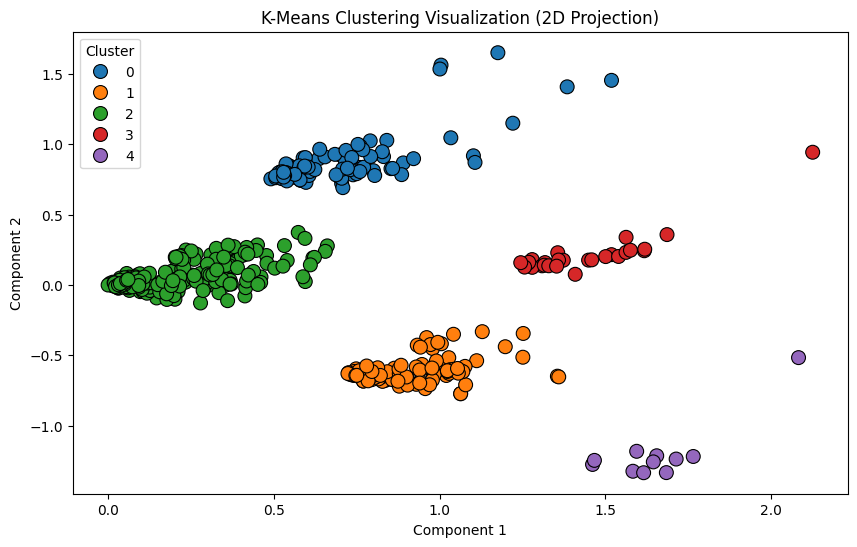

Finished displaying at: 2025-02-23 01:40:38 

Finished executing at: 2025-02-23 01:40:38 



In [183]:
run_k_means(5, documents)

Executing 9 start time: 2025-02-23 01:40:38
K=9: Silhouette Score and WSS=0.0031	4277.7970
copied to clipboard

Cluster 0:
- Kuwait hosts high-level forum to discuss International Islamic Court of Justice
- ECC approves transfer of shares of DISCOs in President of Pakistan’s name
- Law ministry notifies appointments of six SC judges, four high court chief justices
- 'No fear of references if innocent,' says Justice Mansoor Ali Shah
- Justice Sarfraz Dogar sworn in as acting chief justice of IHC

Cluster 1:
- CM highlights radio’s enduring role on World Radio Day
- Centre exploring olive production on commercial basis in Chagai
- Drake and PARTYNEXTDOOR drop $ome $exy $ongs 4 U on Valentine’s Day
- House Democrats urge Trump to retract comments on Gaza
- Economist Stiglitz urges tariffs on Trump’s ‘dysfunctional’ admin

Cluster 2:
- Caught in crossfire? Women under siege in influencer culture
- PAF’s JF-17 to perform at Champions Trophy opening ceremony in Karachi
- CM Murad invites Jap

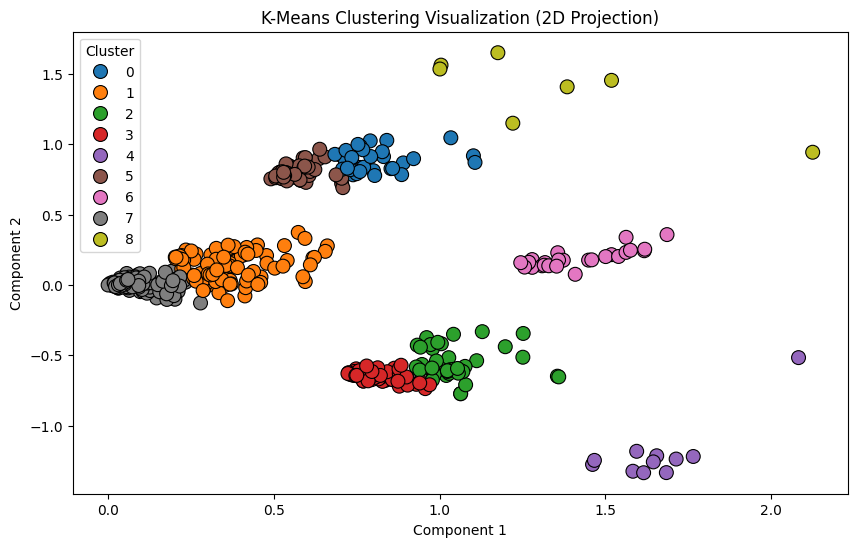

Finished displaying at: 2025-02-23 01:40:38 

Finished executing at: 2025-02-23 01:40:38 



In [184]:
run_k_means(9, documents)

Executing 13 start time: 2025-02-23 01:40:38
K=13: Silhouette Score and WSS=-0.0008	4212.1184
copied to clipboard

Cluster 0:
- Kuwait hosts high-level forum to discuss International Islamic Court of Justice
- ECC approves transfer of shares of DISCOs in President of Pakistan’s name
- Law ministry notifies appointments of six SC judges, four high court chief justices
- 'No fear of references if innocent,' says Justice Mansoor Ali Shah
- Justice Sarfraz Dogar sworn in as acting chief justice of IHC

Cluster 1:
- ‘We risk losing hold on reality’: Scarlett Johansson slams AI video of stars protesting against Kanye
- Livestock cards to be delivered on time, says minister
- New Zealand provide update on Rachin Ravindra's injury ahead of tri-series final
- Drake and PARTYNEXTDOOR drop $ome $exy $ongs 4 U on Valentine’s Day
- Justice Jahangiri declares writing advocate on vehicles' number plates illegal

Cluster 2:
- Gold adds to record rally, reaches Rs306,200 per tola in Pakistan
- Catherin

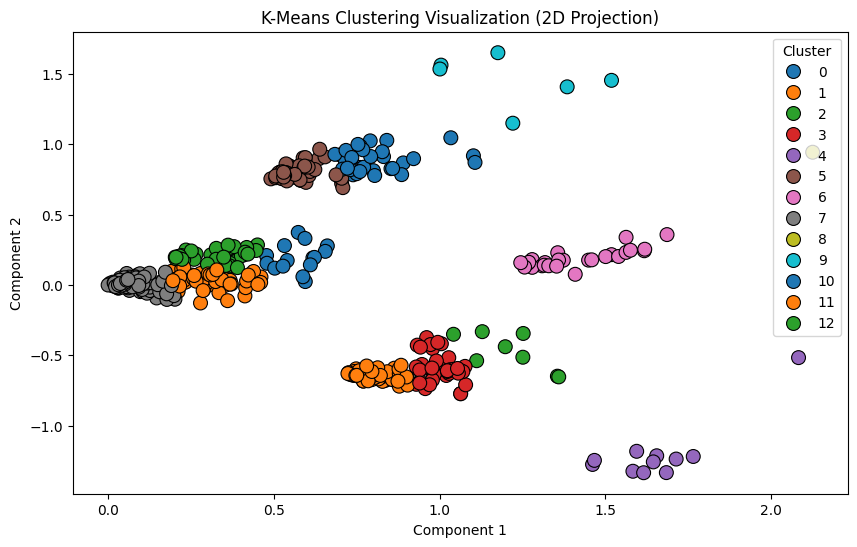

Finished displaying at: 2025-02-23 01:40:38 

Finished executing at: 2025-02-23 01:40:38 



In [185]:
run_k_means(13, documents)